### 1. Initializing Developer Credentials

In [1]:
import praw
import pandas as pd
from datetime import datetime, timedelta

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='iHJMBdnO5iGHhBkXxixt0Q',
                     client_secret='-0K1jhtSUfGrEECt0p7YcANMGM6rwQ',
                     user_agent='test',
                     username='smmtest',
                     password='SMMclass22!!')
 

/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2. A script for getting X number of Reddit comments under a specific post

1. * Subreddit: r/apple
   * postid = 1b1jxjf
   * Post Title = 'Apple Cancels Work on Electric Car, Shifts Team to Generative AI'

In [2]:
from praw.models import MoreComments
import pandas as pd

# Assuming `reddit` has already been authenticated as shown in previous examples
post_id = '1b1jxjf'

post = reddit.submission(id=post_id)

# Fetch all top-level comments
post.comments.replace_more(limit=None)  # Replace MoreComments objects
comments = post.comments.list()

# Sort comments by score in descending order and take the top 250
top_comments = sorted(comments, key=lambda comment: comment.score, reverse=True)[:250]

data = []

for comment in top_comments:
    author = comment.author.name if comment.author else '[deleted]'
    text = comment.body
    date = comment.created_utc
    score = comment.score
    data.append([author, text, date, score])

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Author', 'Text', 'Date', 'Upvotes_count'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data_post1.csv', index=False)

# Output the path to the saved CSV filec

2. * Subreddit: r/apple
   * postid = khpvq0
   * Post Title = 'Apple targets car production by 2024 and eyes 'next level' battery technology'

In [3]:
from praw.models import MoreComments
import pandas as pd

# Assuming `reddit` has already been authenticated as shown in previous examples
post_id = 'khpvq0'

post = reddit.submission(id=post_id)

# Fetch all top-level comments
post.comments.replace_more(limit=None)  # Replace MoreComments objects
comments = post.comments.list()

# Sort comments by score in descending order and take the top 250
top_comments = sorted(comments, key=lambda comment: comment.score, reverse=True)[:250]

data = []

for comment in top_comments:
    author = comment.author.name if comment.author else '[deleted]'
    text = comment.body
    date = comment.created_utc
    score = comment.score
    data.append([author, text, date, score])

# Create a pandas DataFrame from the data
df = pd.DataFrame(data, columns=['Author', 'Text', 'Date', 'Score'])

# Write the DataFrame to a CSV file
df.to_csv('reddit_data_post2.csv', index=False)

In [4]:
import pandas as pd
from datetime import datetime

# Load your dataset
df = pd.read_csv('reddit_data_post1.csv')

# Define a function to convert Unix timestamps to a readable date format
def convert_timestamp(unix_timestamp):
    return datetime.utcfromtimestamp(unix_timestamp).strftime('%Y-%m-%d %H:%M:%S')

# Convert the 'date' column to float, in case it's not
df['Date'] = df['Date'].astype(float)

# Apply the function to the 'date' column
df['Date'] = df['Date'].apply(convert_timestamp)

# Save the modified DataFrame back to CSV if needed
df.to_csv('reddit_data_post1.csv', index=False)

In [5]:
import pandas as pd
from datetime import datetime

# Load your dataset
df = pd.read_csv('reddit_data_post2.csv')

# Define a function to convert Unix timestamps to a readable date format
def convert_timestamp(unix_timestamp):
    return datetime.utcfromtimestamp(unix_timestamp).strftime('%Y-%m-%d %H:%M:%S')

# Convert the 'date' column to float, in case it's not
df['Date'] = df['Date'].astype(float)

# Apply the function to the 'date' column
df['Date'] = df['Date'].apply(convert_timestamp)

# Save the modified DataFrame back to CSV if needed
df.to_csv('reddit_data_post2.csv', index=False)

### 3. Preprocessing

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
reddit_data1 = pd.read_csv('reddit_data_post1.csv')  # Replace with your file path

# Preprocess function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to each comment
reddit_data1['cleaned_text'] = reddit_data1['Text'].apply(preprocess_text)

# Display the first few rows of the processed dataset


# Save the preprocessed data to a new CSV file
reddit_data1.to_csv('preprocessed_reddit_data_post1.csv', index=False)

reddit_data1.head()

,Author,Text,Date,Upvotes_count,cleaned_text
0,Wasaab,This is like the 1000th time (being dramatic) ...,2024-02-27 19:10:05,1708,like 1000th time dramatic hear apple canceling...
1,frownGuy12,I’m sure the heat pump engineers will do great...,2024-02-27 19:05:27,1067,’ sure heat pump engineers great work next tok...
2,IAmA5starman,"That title makes no sense, its like saying the...",2024-02-27 19:09:11,345,title makes sense like saying chefs hotel move...
3,stroll_on,"If Apple was serious about EVs, they would jus...",2024-02-27 19:25:55,297,apple serious evs would buy rivian
4,throwmeaway1784,"Bloomberg isn’t homogeneous, Mark Gurman has a...",2024-02-27 19:29:00,194,bloomberg ’ homogeneous mark gurman excellent ...


In [26]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
reddit_data2 = pd.read_csv('reddit_data_post2.csv')  # Replace with your file path

# Preprocess function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to each comment
reddit_data2['cleaned_text'] = reddit_data2['Text'].apply(preprocess_text)

# Display the first few rows of the processed dataset


# Save the preprocessed data to a new CSV file
reddit_data2.to_csv('preprocessed_reddit_data_post2.csv', index=False)

reddit_data2.head()

,Author,Text,Date,Score,cleaned_text
0,surfinfan21,At this rate I’m just going to have my paychec...,2020-12-21 21:54:43,2201,rate ’ going paycheck deposited apple refund a...
1,vishnusbasement,I wonder if Apple Care for these cars is going...,2020-12-21 21:08:23,1959,wonder apple care cars going replace tradition...
2,LowerMontaukBranch,More intrigued by the battery technology. I ho...,2020-12-21 21:22:56,815,intrigued battery technology hope 2020s brings...
3,KillaWillaSea,I feel like Apple could absolutely pull this o...,2020-12-21 20:52:00,621,feel like apple could absolutely pull come ahe...
4,[deleted],[deleted],2020-12-21 21:06:09,599,deleted


In [27]:
reddit_data1.rename(columns={'Score': 'Upvotes_count'}, inplace=True)

In [28]:
reddit_data1.head()

,Author,Text,Date,Upvotes_count,cleaned_text
0,Wasaab,This is like the 1000th time (being dramatic) ...,2024-02-27 19:10:05,1708,like 1000th time dramatic hear apple canceling...
1,frownGuy12,I’m sure the heat pump engineers will do great...,2024-02-27 19:05:27,1067,’ sure heat pump engineers great work next tok...
2,IAmA5starman,"That title makes no sense, its like saying the...",2024-02-27 19:09:11,345,title makes sense like saying chefs hotel move...
3,stroll_on,"If Apple was serious about EVs, they would jus...",2024-02-27 19:25:55,297,apple serious evs would buy rivian
4,throwmeaway1784,"Bloomberg isn’t homogeneous, Mark Gurman has a...",2024-02-27 19:29:00,194,bloomberg ’ homogeneous mark gurman excellent ...


### 4. Sentiment analysis using VADER

In [40]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataset
df1 = pd.read_csv('preprocessed_reddit_data_post1.csv')

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores and categorize
def sentiment_category(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    # Categorize based on the compound score
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

# Apply the function to the 'Text' column to get sentiment scores and categories for each comment
df1[['Sentiment', 'Compound_Score']] = df['Text'].apply(lambda x: pd.Series(sentiment_category(x)))

# Display the first few rows to see the sentiment scores and categories along with the existing data
print(df1.head())

df1.to_csv('reddit_data_sentiment_post1.csv')

            Author                                               Text  \
0           Wasaab  This is like the 1000th time (being dramatic) ...   
1       frownGuy12  I’m sure the heat pump engineers will do great...   
2     IAmA5starman  That title makes no sense, its like saying the...   
3        stroll_on  If Apple was serious about EVs, they would jus...   
4  throwmeaway1784  Bloomberg isn’t homogeneous, Mark Gurman has a...   

                  Date  Upvotes_count  \
0  2024-02-27 19:10:05           1708   
1  2024-02-27 19:05:27           1067   
2  2024-02-27 19:09:11            345   
3  2024-02-27 19:25:55            297   
4  2024-02-27 19:29:00            194   

                                        cleaned_text Sentiment  Compound_Score  
0  like 1000th time dramatic hear apple canceling...   Neutral          0.0000  
1  ’ sure heat pump engineers great work next tok...  Positive          0.4939  
2  title makes sense like saying chefs hotel move...  Positive         

In [41]:
df1.rename(columns={'Score': 'Upvotes_count'}, inplace=True)
df1.head()

,Author,Text,Date,Upvotes_count,cleaned_text,Sentiment,Compound_Score
0,Wasaab,This is like the 1000th time (being dramatic) ...,2024-02-27 19:10:05,1708,like 1000th time dramatic hear apple canceling...,Neutral,0.0000
1,frownGuy12,I’m sure the heat pump engineers will do great...,2024-02-27 19:05:27,1067,’ sure heat pump engineers great work next tok...,Positive,0.4939
2,IAmA5starman,"That title makes no sense, its like saying the...",2024-02-27 19:09:11,345,title makes sense like saying chefs hotel move...,Positive,0.4404
3,stroll_on,"If Apple was serious about EVs, they would jus...",2024-02-27 19:25:55,297,apple serious evs would buy rivian,Positive,0.8807
4,throwmeaway1784,"Bloomberg isn’t homogeneous, Mark Gurman has a...",2024-02-27 19:29:00,194,bloomberg ’ homogeneous mark gurman excellent ...,Neutral,0.0000


In [31]:
# import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataset
df2 = pd.read_csv('preprocessed_reddit_data_post2.csv')

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores and categorize
def sentiment_category(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    # Categorize based on the compound score
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

# Apply the function to the 'Text' column to get sentiment scores and categories for each comment
df2[['Sentiment', 'Compound_Score']] = df['Text'].apply(lambda x: pd.Series(sentiment_category(x)))

# Display the first few rows to see the sentiment scores and categories along with the existing data


df.to_csv('reddit_data_sentiment_post2.csv')
df2.head()

,Author,Text,Date,Score,cleaned_text,Sentiment,Compound_Score
0,surfinfan21,At this rate I’m just going to have my paychec...,2020-12-21 21:54:43,2201,rate ’ going paycheck deposited apple refund a...,Neutral,0.0000
1,vishnusbasement,I wonder if Apple Care for these cars is going...,2020-12-21 21:08:23,1959,wonder apple care cars going replace tradition...,Positive,0.4939
2,LowerMontaukBranch,More intrigued by the battery technology. I ho...,2020-12-21 21:22:56,815,intrigued battery technology hope 2020s brings...,Positive,0.4404
3,KillaWillaSea,I feel like Apple could absolutely pull this o...,2020-12-21 20:52:00,621,feel like apple could absolutely pull come ahe...,Positive,0.8807
4,[deleted],[deleted],2020-12-21 21:06:09,599,deleted,Neutral,0.0000


### Sentiment Over Time

/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

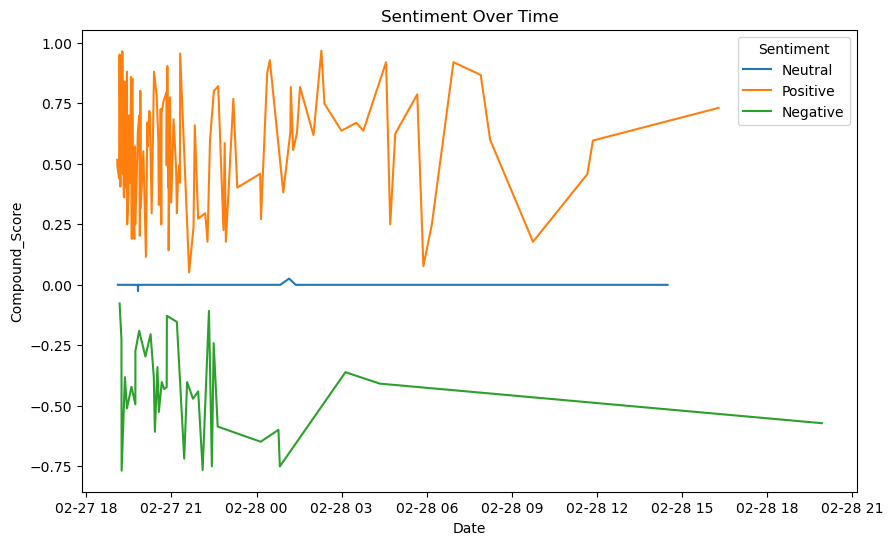

In [42]:
# Convert 'date' column to datetime format
import matplotlib.pyplot as plt
import seaborn as sns

df1['Date'] = pd.to_datetime(df1['Date'])

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Compound_Score', hue='Sentiment', data=df1)
plt.title('Sentiment Over Time')
plt.show()


/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/anushachebolu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

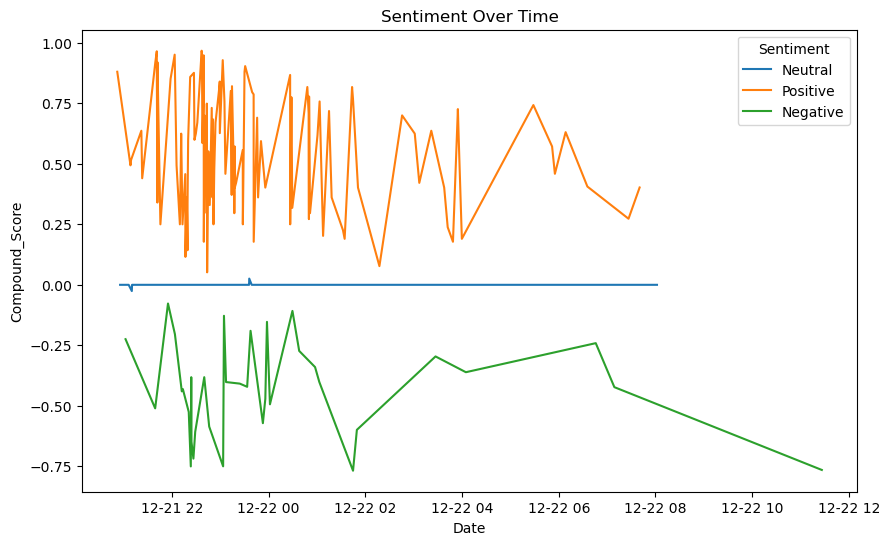

In [43]:
# Convert 'date' column to datetime format

df2['Date'] = pd.to_datetime(df2['Date'])

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Compound_Score', hue='Sentiment', data=df2)
plt.title('Sentiment Over Time')
plt.show()